In [1]:
#Import required libraries
import sys
import os

import sklearn
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

C:\Users\awhit\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
#Import Sentiment Dataset
amazon = pd.read_csv('amazon_cells_labelled.txt', delimiter ='\t', header = None)
imdb = pd.read_csv('imdb_labelled.txt', delimiter ='\t', header = None)
yelp = pd.read_csv('yelp_labelled.txt', delimiter ='\t', header = None)

#Create columns for merge
amazon.columns =['Review','Sentiment']
imdb.columns =['Review','Sentiment']
yelp.columns =['Review','Sentiment']

#Merge
Reviews = pd.concat([amazon,imdb,yelp], ignore_index = True)

In [3]:
Reviews.to_csv('Reviews.csv')

In [4]:
Reviews.describe()

,Sentiment
count,2748.000000
mean,0.504367
std,0.500072
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [5]:
#Character count - List of characters
CustomerReviews = Reviews['Review']
characters = []
for comment in CustomerReviews:
    for character in comment:
        if character not in characters:
            characters.append(character)
print(characters)

['S', 'o', ' ', 't', 'h', 'e', 'r', 'i', 's', 'n', 'w', 'a', 'y', 'f', 'm', 'p', 'l', 'u', 'g', 'U', 'I', 'b', 'c', 'v', '.', 'G', 'd', ',', 'E', 'x', 'j', 'T', '4', '5', 'M', 'A', 'J', 'O', 'R', 'P', 'B', 'L', '!', 'z', 'N', 'W', 'q', 'H', '+', 'V', '"', 'Y', 'D', 'F', 'k', "'", 'K', 'C', '/', '7', '3', '6', '8', '0', '2', '?', 'Z', '-', '1', ':', ')', '(', 'Q', '&', '$', '*', ';', 'X', '%', '9', '#', '[', ']', '\x96', '\t', '\n', 'é', '\x85', 'å', '\x97', 'ê']


In [6]:
#Remove unusual characters/stop words
stop = stopwords.words('english')

Reviews['Review'] = Reviews['Review'].apply(lambda x: ' '.join([w for w in word_tokenize(x.lower()) if w.isalpha()]))
Reviews['Review'] = Reviews['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [7]:
#Check for blank rows 
Reviews[Reviews['Review'] == ''].index

Int64Index([641, 1064, 1590, 1659, 1888], dtype='int64')

In [8]:
#Check for missing data and remove blank rows if any
Reviews.isnull().sum()


Review       0
Sentiment    0
dtype: int64

In [9]:
Reviews = Reviews.drop([641,1064,1590,1659,1888], axis = 'index')

In [10]:
Reviews

,Review,Sentiment
0,way plug us unless go converter,0
1,good case excellent value,1
2,great jawbone,1
3,tied charger conversations lasting problems,0
4,mic great,1
...,...,...
2743,think food flavor texture lacking,0
2744,appetite instantly gone,0
2745,overall impressed would go back,0
2746,whole experience underwhelming think go ninja ...,0


In [11]:
#Measure vocabulary size 
VocabCount= Tokenizer()
VocabCount.fit_on_texts(Reviews['Review'])

print('vocab count: ', len(VocabCount.word_index) + 1)
print(VocabCount.word_index)

vocab count:  4848
{'good': 1, 'great': 2, 'movie': 3, 'phone': 4, 'film': 5, 'one': 6, 'food': 7, 'like': 8, 'place': 9, 'time': 10, 'service': 11, 'really': 12, 'bad': 13, 'would': 14, 'well': 15, 'best': 16, 'even': 17, 'ever': 18, 'also': 19, 'back': 20, 'could': 21, 'quality': 22, 'go': 23, 'love': 24, 'made': 25, 'product': 26, 'get': 27, 'work': 28, 'excellent': 29, 'works': 30, 'nice': 31, 'better': 32, 'never': 33, 'recommend': 34, 'much': 35, 'use': 36, 'sound': 37, 'headset': 38, 'think': 39, 'way': 40, 'battery': 41, 'first': 42, 'pretty': 43, 'see': 44, 'make': 45, 'acting': 46, 'got': 47, 'still': 48, 'worst': 49, 'say': 50, 'enough': 51, 'two': 52, 'ear': 53, 'little': 54, 'disappointed': 55, 'everything': 56, 'every': 57, 'characters': 58, 'right': 59, 'thing': 60, 'price': 61, 'amazing': 62, 'waste': 63, 'going': 64, 'people': 65, 'definitely': 66, 'case': 67, 'minutes': 68, 'real': 69, 'terrible': 70, 'money': 71, 'look': 72, 'new': 73, 'know': 74, 'experience': 75, '

In [12]:
#Word embedding length
wordcount = len(VocabCount.word_index)+ 1
max_sequence_embedding = int(round(np.sqrt(np.sqrt(wordcount)),0))
max_sequence_embedding

8

In [13]:
#Maximum Sequence length
reviewlen = []
for charlen in Reviews['Review']:
    reviewlen.append(len(charlen.split(' ')))

commentary_max = np.max(reviewlen)
commentary_min = np.min(reviewlen)
commentary_median = np.median(reviewlen)   

commentary_max

665

In [14]:
Reviews

,Review,Sentiment
0,way plug us unless go converter,0
1,good case excellent value,1
2,great jawbone,1
3,tied charger conversations lasting problems,0
4,mic great,1
...,...,...
2743,think food flavor texture lacking,0
2744,appetite instantly gone,0
2745,overall impressed would go back,0
2746,whole experience underwhelming think go ninja ...,0


In [15]:
#Sequences
sequences = VocabCount.texts_to_sequences(Reviews['Review'])
Reviews['Sequences'] = sequences

Reviews['Padded'] = pad_sequences(Reviews.Sequences, padding = 'post').tolist()


In [16]:
Reviews.to_csv('Reviews2.csv')

In [17]:
#Split dataset
X = Reviews['Padded'].to_list()
X = np.array(X)

y = Reviews['Sentiment'].to_list()
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 40, test_size = .3, stratify = y )
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, random_state = 40, test_size=.25, stratify = y_train)

#print(X_train.shape,X_test.shape,X_validation.shape)

In [18]:
#Provide a copy of dataset

X_traindata = pd.DataFrame(X_train)
X_traindata.to_csv('D213-Xtrain.csv')
X_testdata = pd.DataFrame(X_test)
X_testdata.to_csv('D213-Xtest.csv')
y_traindata = pd.DataFrame(y_train)
y_traindata.to_csv('D213-ytrain.csv')
y_testdata = pd.DataFrame(y_test)
y_testdata.to_csv('D213-ytest.csv')


In [19]:
### Create Keras model
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Activation, Flatten

num_epochs = 4
early_stopping_monitor = EarlyStopping(patience=2)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(wordcount,max_sequence_embedding, input_length =  commentary_max, input_shape = (1,)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(75, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'sigmoid')
])
model.add(Flatten())

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

history = model.fit(X_train,y_train, batch_size = 30, epochs = num_epochs, callbacks = early_stopping_monitor, verbose = True,validation_data = (X_validation,y_validation), shuffle = True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 8)              38784     
                                                                 
 global_average_pooling1d (G  (None, 8)                0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 100)               900       
                                                                 
 dense_1 (Dense)             (None, 75)                7575      
                                                                 
 dense_2 (Dense)             (None, 2)                 152       
                                                                 
 flatten (Flatten)           (None, 2)                 0         
                                                        

In [20]:
ModelAccuracy = model.evaluate(X_test,y_test)
print(f'Test loss: {ModelAccuracy[0]} / Test accuracy: {ModelAccuracy[1]}')

26/26 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4957
Test loss: 0.6931098699569702 / Test accuracy: 0.49574726819992065


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


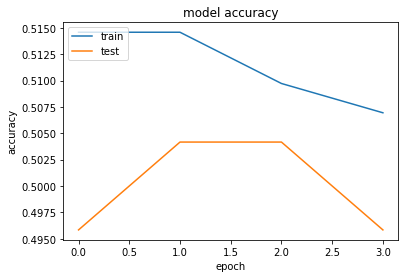

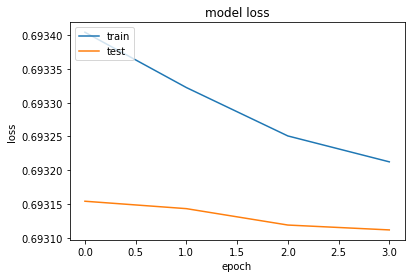

In [21]:
#Provide visualizations of the model's training process - machine learning mastery.com
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
#Save the trained network within the neural network
model.save('ReviewsSentimentAnalysis.h5')